In [1]:
import pandas as pd

In [3]:
qualiText = pd.read_csv('Dataset/QualitativeData_Text.csv')

In [6]:
obsCoded = [None for val in range(266)]
print(len(obsCoded))
qualiText['obsCoded'] = obsCoded

266


In [ ]:
qualiText_shuffled = qualiText.sample(frac= 1, random_state= 1)
print(qualiText_shuffled)

In [ ]:
def beginCodingObs():
    count = 0
    for inds in qualiText_shuffled.T:
        statement = qualiText_shuffled['ObservationText'][inds]
        print(statement)

        if qualiText_shuffled['obsCoded'][inds] not in [1, 2, 3, 4, 5]:
            codedVal = input(f'On a scale from detail-oriented (1) to big-picture (5), where do you rate the statement: {statement}')
            if codedVal == 'Break':
                break
            qualiText_shuffled['obsCoded'][inds] = int(codedVal)
        
        print(qualiText_shuffled['obsCoded'][inds])
        count += 1
        print(f'count: {count}')
        

beginCodingObs()

In [57]:
qualiText_shuffled.to_csv('trevor_Shuffled')

In [2]:
trevorCoded = pd.read_csv('Dataset/trevor_Shuffled.csv')
samCoded = pd.read_csv('Dataset/sam_Shuffled.csv')

trevorCoded.sort_values(by= 'ObservationNum', ignore_index= True, inplace= True)
samCoded.sort_values(by= 'ObservationNum', ignore_index= True, inplace= True)

In [3]:
print(trevorCoded['obsCoded'].mean())
print(samCoded['obsCoded'].mean())

2.699248120300752
3.082706766917293


In [5]:
import matplotlib.pyplot as plt
import numpy as np

(array([57.,  0., 78.,  0.,  0., 43.,  0., 64.,  0., 24.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

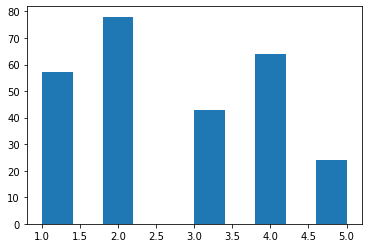

In [6]:
plt.hist(trevorCoded['obsCoded'])

(array([23.,  0., 67.,  0.,  0., 72.,  0., 73.,  0., 31.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

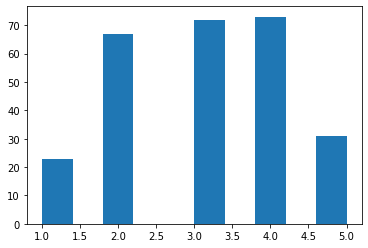

In [7]:
plt.hist(samCoded['obsCoded'])

In [21]:
studentKey = [[1, 'Detail'], [2, 'Mix'], [3, 'Detail'], [4, 'Detail'], [5, 'Mix'], [6, 'Mix'], [7, 'Big'], [8, 'Detail'], [10, 'Mix'], [11, 'Mix'], [12, 'Detail'], [13, 'Mix'], [14, 'Detail'], [15, 'Mix'], [16, 'Mix'], [17, 'Mix'], [18, 'Mix']]
studentKey = pd.DataFrame(studentKey).rename(columns={0:'studentNum', 1:'thinkType'})
print(studentKey)

    studentNum thinkType
0            1    Detail
1            2       Mix
2            3    Detail
3            4    Detail
4            5       Mix
5            6       Mix
6            7       Big
7            8    Detail
8           10       Mix
9           11       Mix
10          12    Detail
11          13       Mix
12          14    Detail
13          15       Mix
14          16       Mix
15          17       Mix
16          18       Mix


In [57]:
print("Trevor's coded results")
print('style - student# - coded mean')
for ind, val in enumerate(trevorCoded.groupby('StudentNum')['obsCoded'].mean()):
    print(f'{studentKey["thinkType"][ind]:>6} - {studentKey["studentNum"][ind]} - {round(val, 2)}')

Trevor's coded results
style - student# - coded mean
Detail - 1 - 3.18
   Mix - 2 - 2.24
Detail - 3 - 2.81
Detail - 4 - 3.57
   Mix - 5 - 2.64
   Mix - 6 - 1.83
   Big - 7 - 3.55
Detail - 8 - 2.25
   Mix - 10 - 2.2
   Mix - 11 - 2.85
Detail - 12 - 2.5
   Mix - 13 - 2.14
Detail - 14 - 2.69
   Mix - 15 - 3.7
   Mix - 16 - 4.6
   Mix - 17 - 2.24
   Mix - 18 - 2.45


In [58]:
print("Sam's coded results")
print('style - student# - coded mean')
for ind, val in enumerate(samCoded.groupby('StudentNum')['obsCoded'].mean()):
    print(f'{studentKey["thinkType"][ind]:>6} - {studentKey["studentNum"][ind]} - {round(val, 2)}')

Sam's coded results
style - student# - coded mean
Detail - 1 - 2.82
   Mix - 2 - 3.12
Detail - 3 - 3.06
Detail - 4 - 4.0
   Mix - 5 - 2.64
   Mix - 6 - 2.75
   Big - 7 - 3.27
Detail - 8 - 3.92
   Mix - 10 - 2.47
   Mix - 11 - 2.0
Detail - 12 - 3.8
   Mix - 13 - 3.29
Detail - 14 - 3.85
   Mix - 15 - 2.2
   Mix - 16 - 3.0
   Mix - 17 - 2.88
   Mix - 18 - 3.36


In [90]:
comp_list = []
deltas = []

for ind, val in enumerate(trevorCoded.groupby('StudentNum')['obsCoded'].mean()):
    comp_list.append([val,'_'])
for ind, val in enumerate(samCoded.groupby('StudentNum')['obsCoded'].mean()):
    comp_list[ind][1] = val

print('diff T & S, avg 0.83')
print('student# - delta')
for ind, val in enumerate(comp_list):
    delta = round(abs(val[0] - val[1]), 2)
    print(f'{studentKey["studentNum"][ind]:>2} - {delta}')
    deltas.append(delta)

diff T & S, avg 0.83
student# - delta
 1 - 0.36
 2 - 0.88
 3 - 0.25
 4 - 0.43
 5 - 0.0
 6 - 0.92
 7 - 0.27
 8 - 1.67
10 - 0.27
11 - 0.85
12 - 1.3
13 - 1.14
14 - 1.15
15 - 1.5
16 - 1.6
17 - 0.65
18 - 0.91


In [85]:
print(round(sum(deltas)/len(deltas), 2))

0.83
